In [10]:
import mtgstats.scryfall.api as api
import mtgstats.cards as c
from mtgstats.analysis import cmc_analysis, color_analysis
from mtgstats.plots import cmc_distribution
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
stats = {}

In [3]:
query = api.search('t:creature sort:edhrec', limit=100)
cards = c.parse_cards(query)
data = pd.DataFrame(cards)

In [4]:
data.head()

,name,mana_cost,cmc,type_line,oracle_text,power,toughness,colors,color_identity,keywords,rarity,edhrec_rank
0,Solemn Simulacrum,{4},4.0,Artifact Creature — Golem,"When Solemn Simulacrum enters the battlefield,...",2,2,[],[],[],rare,20
1,Sakura-Tribe Elder,{1}{G},2.0,Creature — Snake Shaman,Sacrifice Sakura-Tribe Elder: Search your libr...,1,1,[G],[G],[],common,36
2,Eternal Witness,{1}{G}{G},3.0,Creature — Human Shaman,"When Eternal Witness enters the battlefield, y...",2,1,[G],[G],[],uncommon,37
3,Llanowar Elves,{G},1.0,Creature — Elf Druid,{T}: Add {G}.,1,1,[G],[G],[],common,47
4,Birds of Paradise,{G},1.0,Creature — Bird,Flying\n{T}: Add one mana of any color.,0,1,[G],[G],[Flying],rare,58


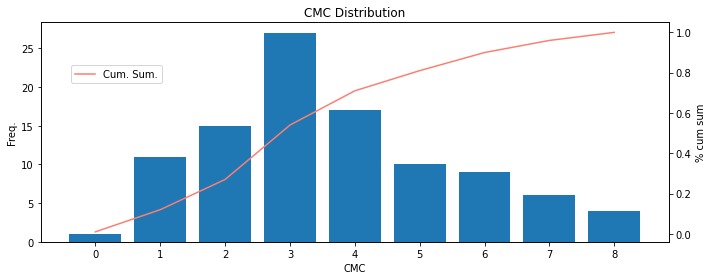

In [5]:
cmc_distribution(cards)

In [6]:
dist, cumsum = cmc_analysis(cards, normalize_cumsum=False)
stats['cmc'] = { 
    'freq'   : dist,
    'cumsum' : cumsum
}

In [8]:
colors = color_analysis(cards)
            
colors_freq = pd.Series(colors)
colors_freq = colors_freq.sort_values(ascending=False)

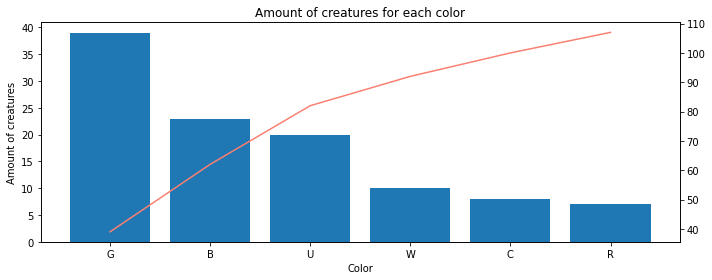

In [16]:
color_distribution(cards)

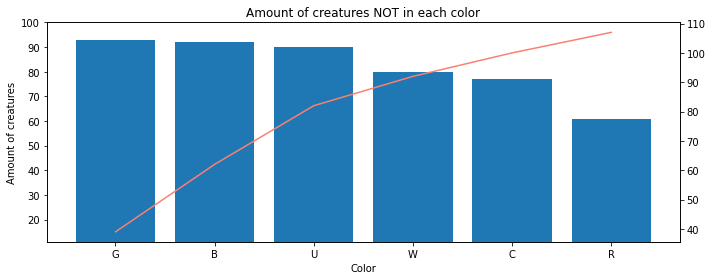

In [29]:
not_in_color_distribution(cards)